# <span style = "color: green" >Simple Linear Regression Project (Gold Price Prediction) </span>

***

Of all the precious metals, gold is the most popular as an investment. Investors generally buy gold as a way of diversifying risk, especially through the use of futures contracts and derivatives. The gold market is subject to speculation and volatility as are other markets. Compared to other precious metals used for investment, gold has been the most effective safe haven across a number of countries.<br><br>
The Dataset contain gold prices (in USD) from 2001 to 2019.
Our goal is to predict where the gold prices will be in the coming years

#### Import the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Read 'gold_price_usd.csv' & store it in a variable

In [2]:
df=pd.read_csv('gold_price_usd.csv')

#### View the first 5 rows

In [3]:
df.head()

,Date,USD (AM)
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60


#### Check the information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4718 non-null   object 
 1   USD (AM)  4718 non-null   float64
dtypes: float64(1), object(1)
memory usage: 73.8+ KB


#### Find the columns

In [49]:
df.columns

Index(['Date', 'USD (AM)'], dtype='object')

#### Rename USD (AM) to Price

In [5]:
df.rename(columns={'USD (AM)':'Price'},inplace=True)
year=df['Date'].apply(lambda x:x.split('-')[0])
months=df['Date'].apply(lambda x:x.split('-')[1])
df['Year']=year
df['Months']=months
df.head()

,Date,Price,Year,Months
0,2001-01-02,272.80,2001,01
1,2001-01-03,269.00,2001,01
2,2001-01-04,268.75,2001,01
3,2001-01-05,268.00,2001,01
4,2001-01-08,268.60,2001,01


#### Check if there are any missing values in the dataset

In [51]:
df.isnull().sum()

Date      0
Price     0
Year      0
Months    0
dtype: int64

#### Gather the basic statistical information about the dataset

In [52]:
df.describe()

,Price
count,4718.000000
mean,959.990812
std,449.456217
min,256.700000
25%,449.112500
50%,1113.125000
75%,1293.750000
max,1896.500000


#### Convert Date column from object to datetime format

In [6]:
df['Date']=pd.to_datetime(df['Date'])
type(df['Date'][0])


pandas._libs.tslibs.timestamps.Timestamp

In [7]:
df['Months']=pd.to_numeric(df['Months'])

In [8]:
df['Year']=pd.to_numeric(df['Year'])

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4718 non-null   datetime64[ns]
 1   Price   4718 non-null   float64       
 2   Year    4718 non-null   int64         
 3   Months  4718 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 147.6 KB


#### Create a new column with Year

#### Create a new column with Months

#### See all the years and Months in our dataset

In [128]:
df['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [58]:
#Years

In [59]:
#Months
df['Months'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

## <span style = "color: orange" >Visualization</span>

### Create a regression plot with x-axis as years and y-axis as Price

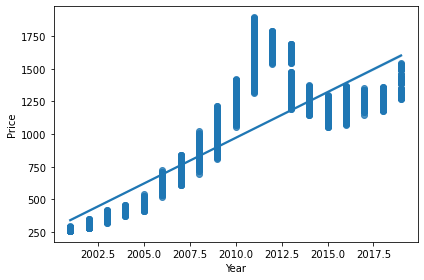

In [9]:
df.head()
sns.regplot(x='Year',y='Price',data=df)
plt.tight_layout()

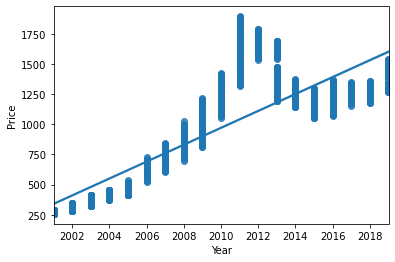

In [39]:
#values can vary 

### Plot a histplot to find the variation in price

<AxesSubplot:xlabel='Price', ylabel='Count'>

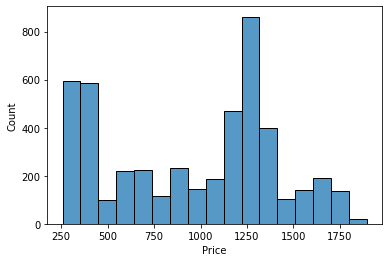

In [14]:
sns.histplot(data=df,x='Price')

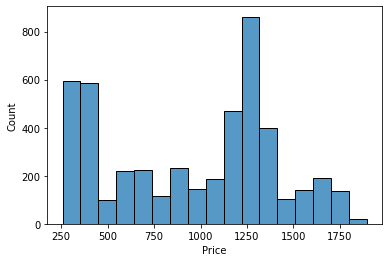

### Assign year and price in x and y variables

In [26]:
X = df[['Year']]  #independent var
y = df[['Price']]   #dependent var

### Split the data into traning and testin set

We will train our model on the training set and then use the test set to evaluate the model

In [11]:
# import train_test split
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [13]:
len(X_train),len(y_train)

(3302, 3302)

In [14]:
len(X_test),len(y_test)

(1416, 1416)

## Train Data

In [15]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

### Create Linear Regression Model

In [16]:
model=LinearRegression()

### Train the  model

In [17]:
model.fit(X_train,y_train)

LinearRegression()

### Check the score of our model

In [138]:
model.score(X_train,y_train)

0.7100343674077215

0.7048691960223041

### Check the coefficient and Intercept

In [78]:
model.coef_,model.intercept_ #(coefficient and intercept)

(array([69.42310649]), -138573.79417382326)

In [79]:
#print the intercept


In [72]:
#print the coefficent


array([70.17366927])

### Make Prediction with Test data

In [18]:
# Also store the predicted values in a variable
predicted_val=model.predict(X_test)
predicted_val

array([ 830.90928609, 1250.74114645,  900.88126281, ...,  411.07742573,
        341.105449  ,  481.04940245])

In [25]:
X_test

,Year
1913,2008
3375,2014
2103,2009
1404,2006
4707,2019
...,...
1267,2006
183,2001
483,2002
88,2001


In [29]:
y

,Price
0,272.80
1,269.00
2,268.75
3,268.00
4,268.60
...,...
4713,1531.85
4714,1541.75
4715,1536.65
4716,1526.55


In [28]:
df1=pd.DataFrame(y_test)
df1.head()
df1['y_test']=df1['Price'].rename('y_test')
df1.drop('Price',inplace=True,axis=1)
df1.head()
df1['predicted_val']=predicted_val
df1['Year']=df['Year']
df1.head()
df1.set_index('Year',inplace=True)

### Create a new dataframe with actual and predicted values with year(X_test) as index

In [23]:
df1.head()

,y_test,predicted_val
Year,,
2008,929.25,830.909286
2014,1292.75,1250.741146
2009,897.00,900.881263
2006,616.40,690.965333
2019,1509.05,1600.601030


,y_test,Prediction
Year,,
2004,425.50,553.709468
2002,307.80,413.362129
2013,1335.75,1185.272491
2007,687.25,764.230476
2009,924.75,904.577814
...,...,...
2009,1088.00,904.577814
2013,1250.75,1185.272491
2012,1776.50,1115.098822


### Check the mean absolute error, mean square error

In [142]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [86]:
mean_squared_error(y_test,predicted_val),mean_absolute_error(y_test,predicted_val)

(62993.24185113211, 191.09004916421839)

In [87]:
r2_score(y_test,predicted_val)

0.6958774817225434

In [97]:
# Mean absolute error


In [116]:
# Mean squared error


58032.97376893121

### Predict the prices for the following years
   * 2025, 2026, 2027, 2028, 2030

In [43]:
price_pr=pd.DataFrame({'year':[2025, 2026, 2027, 2028,2029,2030]})
Pred_price=model.predict(price_pr)
price_pr['Pred_price']=Pred_price
price_pr.set_index('year')

C:\Users\meghn\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- year
Feature names seen at fit time, yet now missing:
- Year

  warnings.warn(message, FutureWarning)


,Pred_price
year,
2025,2020.432890
2026,2090.404867
2027,2160.376844
2028,2230.348821
2029,2300.320797
2030,2370.292774


,Price
2025,2027.356523
2026,2097.530192
2027,2167.703861
2028,2237.877530
2030,2378.224869


***

# <span style = "color:green;font-size:40px"> Great Job!</span>